In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Ronak
[nltk_data]     Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ronak
[nltk_data]     Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
lemmatizer = WordNetLemmatizer()

df = pd.read_csv(r"C:\Users\Ronak Gohil\Documents\updatedd_data.csv")

# Create a set of stop words
stop_words = set(stopwords.words('english'))

def clean_text_optimized(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the optimized cleaning function
df['cleaned_info'] = df['crimeaditionalinfo'].apply(clean_text_optimized)

print(df.head(20))

                     category                               sub_category  \
0           Other Cyber Crime          Cyber Bullying  Stalking  Sexting   
1      Financial Fraud Crimes                          Fraud CallVishing   
2      Financial Fraud Crimes                   Online Gambling  Betting   
3           Other Cyber Crime                           Online Job Fraud   
4      Financial Fraud Crimes                          Fraud CallVishing   
5      Financial Fraud Crimes                         UPI Related Frauds   
6      Financial Fraud Crimes                          Fraud CallVishing   
7      Financial Fraud Crimes             Internet Banking Related Fraud   
8   Women/Child Related Crime  RapeGang Rape RGRSexually Abusive Content   
9           Other Cyber Crime                                      Other   
10          Other Cyber Crime          Cyber Bullying  Stalking  Sexting   
11          Other Cyber Crime                                      Other   
12          

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20000)  # Limit to top 1000 features

# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_info'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())


    aa  aaa  aaadhar  aaap  aaaya  aab  aabhari  aabhi  aaccount  aacount  \
0  0.0  0.0      0.0   0.0    0.0  0.0      0.0    0.0       0.0      0.0   
1  0.0  0.0      0.0   0.0    0.0  0.0      0.0    0.0       0.0      0.0   
2  0.0  0.0      0.0   0.0    0.0  0.0      0.0    0.0       0.0      0.0   
3  0.0  0.0      0.0   0.0    0.0  0.0      0.0    0.0       0.0      0.0   
4  0.0  0.0      0.0   0.0    0.0  0.0      0.0    0.0       0.0      0.0   

   ...  zoho  zomato  zomi  zonal  zone  zoom  zope  zoya  zubair  zyada  
0  ...   0.0     0.0   0.0    0.0   0.0   0.0   0.0   0.0     0.0    0.0  
1  ...   0.0     0.0   0.0    0.0   0.0   0.0   0.0   0.0     0.0    0.0  
2  ...   0.0     0.0   0.0    0.0   0.0   0.0   0.0   0.0     0.0    0.0  
3  ...   0.0     0.0   0.0    0.0   0.0   0.0   0.0   0.0     0.0    0.0  
4  ...   0.0     0.0   0.0    0.0   0.0   0.0   0.0   0.0     0.0    0.0  

[5 rows x 20000 columns]


In [5]:
from sklearn.model_selection import train_test_split

# Assuming 'category' is the target column and using TF-IDF features (X_tfidf) as example input
X = X_tfidf  # Feature matrix from TF-IDF or embeddings
y = df['sub_category']  # Target column

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data (assuming 'category' is the target column and X_tfidf is the feature matrix from TF-IDF)
X = X_tfidf  # Replace with your feature matrix if using embeddings
y = df['sub_category']  # Replace with your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)


In [ ]:
# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

Accuracy: 0.82
Classification Report:
                           precision    recall  f1-score   support

   Financial Fraud Crimes       0.84      0.95      0.89     11653
        Other Cyber Crime       0.76      0.65      0.70      5778
Women/Child Related Crime       0.98      0.45      0.62      1302

                 accuracy                           0.82     18733
                macro avg       0.86      0.68      0.74     18733
             weighted avg       0.82      0.82      0.81     18733



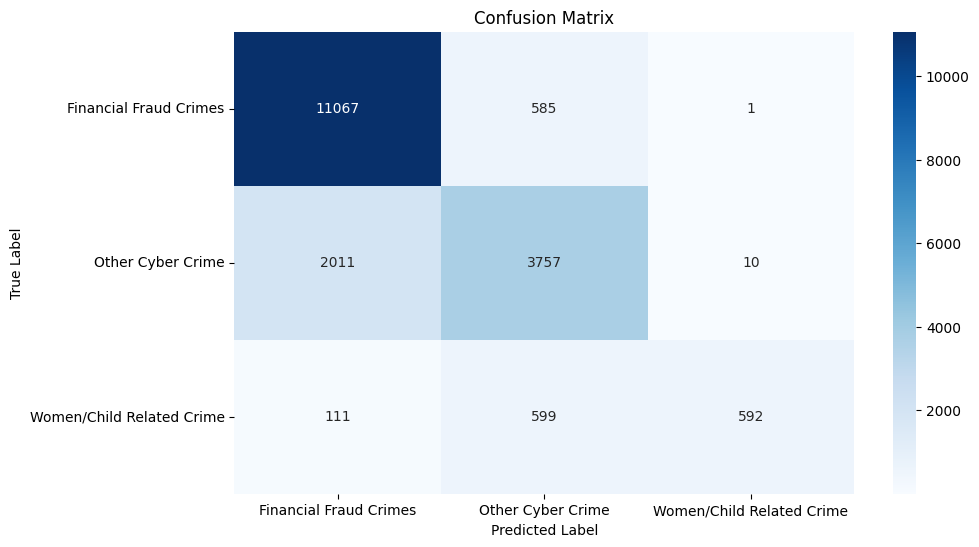

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [16]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict the labels on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report to see precision, recall, and F1-score for each category
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, you can also look at the confusion matrix to understand where the model might be confusing categories
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8229327923984413
Classification Report:
                            precision    recall  f1-score   support

   Financial Fraud Crimes       0.84      0.95      0.89     11653
        Other Cyber Crime       0.76      0.65      0.70      5778
Women/Child Related Crime       0.98      0.45      0.62      1302

                 accuracy                           0.82     18733
                macro avg       0.86      0.68      0.74     18733
             weighted avg       0.82      0.82      0.81     18733

Confusion Matrix:
 [[11067   585     1]
 [ 2011  3757    10]
 [  111   599   592]]


In [17]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [18]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict the labels on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report to see precision, recall, and F1-score for each category
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, you can also look at the confusion matrix to understand where the model might be confusing categories
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8197832701649496
Classification Report:
                            precision    recall  f1-score   support

   Financial Fraud Crimes       0.86      0.92      0.89     11653
        Other Cyber Crime       0.72      0.70      0.71      5778
Women/Child Related Crime       0.98      0.47      0.63      1302

                 accuracy                           0.82     18733
                macro avg       0.85      0.69      0.74     18733
             weighted avg       0.82      0.82      0.81     18733

Confusion Matrix:
 [[10716   936     1]
 [ 1729  4035    14]
 [   76   620   606]]


In [24]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model
rf_model = joblib.load('random_forest_model.joblib')

# Load the new data file (replace 'new_data.csv' with your file path)
new_data = pd.read_csv(r"C:\Users\Ronak Gohil\Documents\fraud1.csv")

# Preprocess the data
# Fill NaN values in the 'crimeaditionalinfo' column with an empty string
new_data['crimeaditionalinfo'] = new_data['crimeaditionalinfo'].fillna("")

# Refit TF-IDF on the original training data, then transform the new data
vectorizer = TfidfVectorizer(max_features=20000)  # Adjust max_features as per training setup
X_train_tfidf = vectorizer.fit_transform(df['crimeaditionalinfo'])  # 'df' should be the original training data
X_new = vectorizer.transform(new_data['crimeaditionalinfo'])

# Predict categories for the new data
predictions = rf_model.predict(X_new)

# Add predictions to the new data DataFrame
new_data['predicted_category'] = predictions

# Save predictions to a new file
new_data.to_csv('predicted_data.csv', index=False)

print("Predictions saved to 'predicted1_data.csv'")


Predictions saved to 'predicted1_data.csv'
